# Title : Video game success analysis 

##  Introduction of the project:
    In this project our aim is to analyze the trends in the marketing pattern for selling video games and get insights for the pattern. Our work is for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. We need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns. This project consists of following parts:
    - Data initialization and loading
    - Data preprocessing
    - Analysis of data
    - Create a user profile for each region
    - Testing the hypothesis

##  First stage:
In this stage import all the libraries needed for the analysis and also load the dataframe and identify the contents in the dataframe.

In [1]:
# Import all libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# Load the dataframe into a variable named df and identify the contents.
df = pd.read_csv('/datasets/games.csv')
display(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


The data frame df consists of 16715 rows and 11 columns. Each column consists of
- Name : Name of the video game
- Platform : Platform
- Year_of_Release :Release year
- Genre : Genre
- NA_sales : North American sales in USD million
- EU_sales :sales in Europe in USD million
- JP_sales :sales in Japan in USD million
- Other_sales :sales in other countries in USD million
- Critic_Score : critic score maximum of 100
- User_Score : user score maximum of 10
- Rating : ESRB rating


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


From the above information all the datas are stored as object or float type which means there is inappropriate numeric format are present in the datatype. For eg. release year is stored as float64 type. Six columns have missing values. Also some column names are uppercase, while others are lower case.

### Conclusion
In this stage we import all the libraries and also load the dataframe into a variable called df. The dataframe consists of 16715 rows and 11 columns. Each row represents different videogames and each column represents the genre, platform, release year, critic score, user score etc. of corresponding games. Some issues found in the dataframe are listed below:
- Inappropriate datatype
- Missing values
- Some column names are uppercase, while others are lower case
So we want to preprocess the data before the analysis.

## Second Stage :
    In this stage correct the formatting in the column headers and deal with the missing values. Then,check whether there are duplicates in the data.

In [4]:
# List of column names in the df table
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
# Renaming columns
df.rename(str.lower, axis='columns', inplace =True)

In [6]:
# Recheck column name:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
# Checking duplicates
print(df.duplicated().sum())

0


The above result shows no duplicated rows in the dataframe.

In [8]:
duplicates =df[df.duplicated(subset=['name','platform','year_of_release'])]
display(duplicates)
df=df.drop_duplicates(subset=['name','platform','year_of_release'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


One of the row is same as row with the missing name. So we should drop that rows.

#### Convert datatypes as needed

In [9]:
# Convert release year to integer value for discrete years.
df['year_of_release']=df['year_of_release'].astype('Int64')

In [10]:
# Check for non numeric values
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
#Replace user score to numeric values
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [12]:
# Convert user scores to float type
df['user_score'] = df['user_score'].astype('float')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Here, we convert all columns to appropriate datat types.

#### Check for missing values

In [14]:
# Count missing values
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

From the above counts, we can see there two values are  missing in name and genre columns, 269 values are missing in year of release, 8578 in critic score, 9125 in user score and 6766 in rating colum.

In [15]:
# Check for missing names
missing_name =df[df['name'].isna()]
display(missing_name)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [16]:
# Reviewer's code

display(df.head(3))

df.tail(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.0,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.0,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.0,0.01,0.0,NaN,NaN,NaN


The above result shows two missing rows with names and in the result we can see the datas are missing in genre, critic-score, user score and rating columns too. So we can remove this two rows, which can't affect the integrity of the data.

In [17]:
# Dropping the columns with missing names
df= df.dropna(subset =['name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Ther are 269 rows are missing in the year of release and we can't remove this rows.  Because it may affect the total sales. So we are going to fill the year with the median of each console. 

In [18]:
# Fill the missing years with median
df['year_of_release'] = df.groupby('platform')['year_of_release'].transform(lambda x:x.fillna(x.median()))

More than 50 percent of values are missing in user_score and critic_score. We can't remove this columns because we remove this may affect the data integrity. So I decide to keep these two columns as such.

In [19]:
# Check for rating values
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [20]:
df['rating'] =df['rating'].fillna('unknown')

The missing rating column is filled as unknown

In [21]:
# Calculate total sales for each game
df['total_sales'] = df['na_sales'] +  df['eu_sales'] + df['jp_sales'] + df['other_sales'] 
display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


From the above information, all the missing datas are removed from name, genre, year and rating columns and keep the critic score and user score as same for the analysis. Also calculate total sales for each game.

### Conclusion:
    In this stage, we preprocess the data for analysis. We change the datatypes to appropriate form, check whether any duplicated values, any missing values etc. In this stage we calculate the total sales for each game also. 

## Third Stage :
    In this stage, we are going to analyze the preprocessed data and also plot some relationships. Here, we analyze the number of games released per year, how sales varies from platform to platform insights about global sales, corelation between reviews and sales, genres with high and low sales etc.

###  Our aim is to find number of games released by each year.

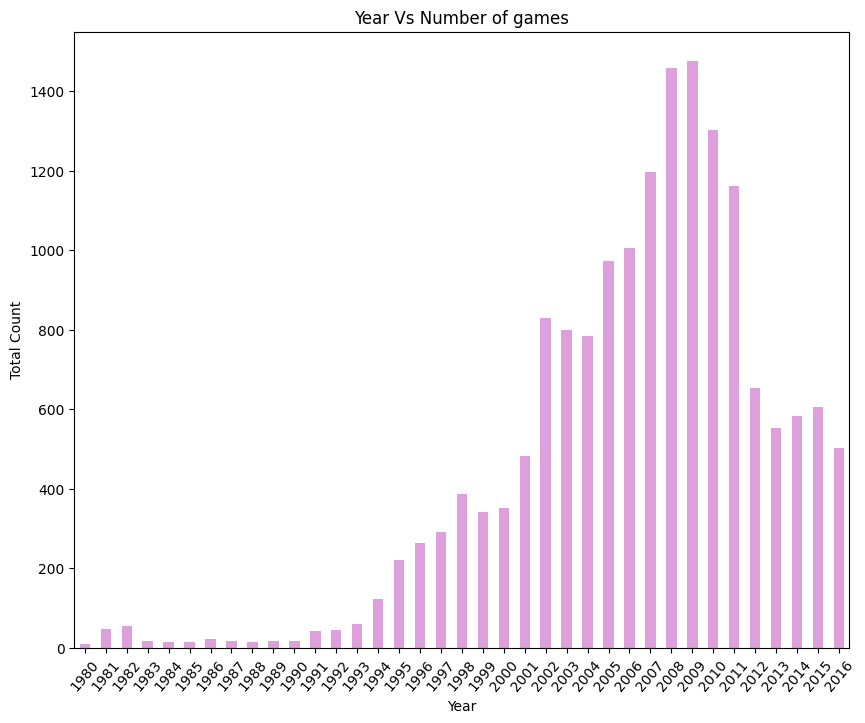

In [61]:
# To find the number of games per year
number_of_games = df.pivot_table(index ='year_of_release', values ='name', aggfunc ='count')
number_of_games = number_of_games.rename(columns = {'name':'count'})
# Plot barplot 
number_of_games.plot(kind='bar', title ='Year Vs Number of games', xlabel ='Year', ylabel ='Total Count', figsize = (10,8), color ='plum', legend =False)
plt.xticks(rotation=50)
plt.show()

The above bar chart shows the number of games released from 1980 to 2016. From the bar chart, it is clear that the number of games released  is increasing  every year upto 2011 and after that there is a decrease. The maximum number of games are released in 2008-2009.

####  Our aim is to find how sales varied from platform to platform. Also find the  platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. Also evaluvate how long does it generally take for new platforms to appear and old ones to fade.

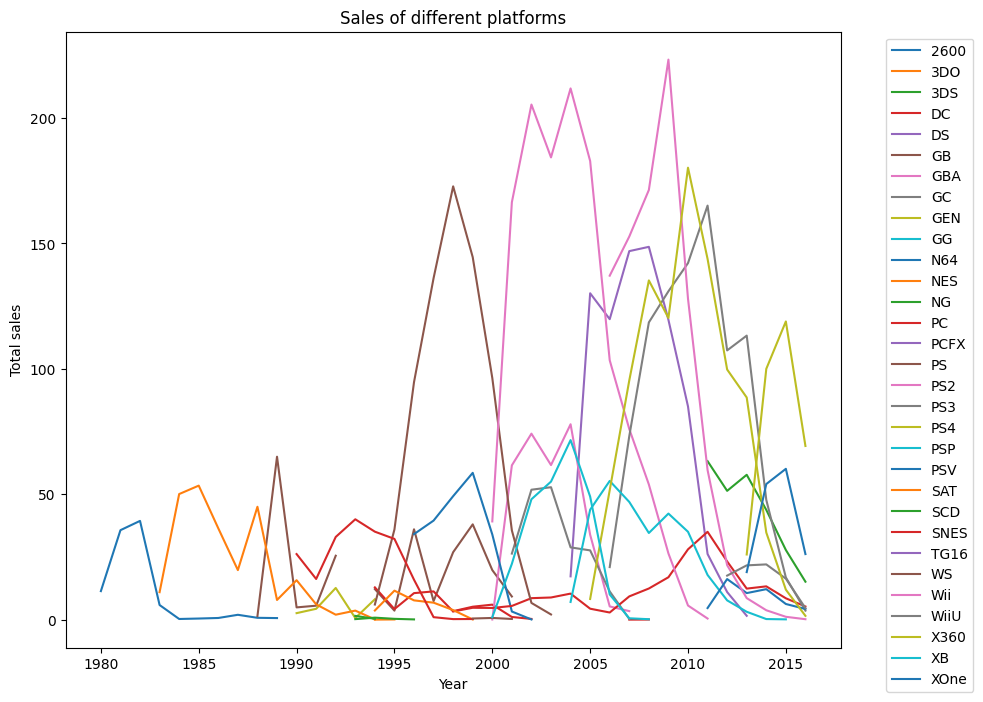

In [54]:
# To find sales for each year and plot linechart
sales_platform =df.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
sales_platform.plot(title ='Sales of different platforms', xlabel = 'Year', ylabel ="Total sales", figsize =(10,8))
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

In [23]:
# To find the platform with greatest total sales
df.groupby(['platform'])['total_sales'].sum().nlargest()

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64

The line chart shows the distribution of each platform based on sales for each year. The top 5 platforms having greatest sales are PS2, X360, PS3, Wii and DS respectively. The popular platforms which now have zero sales are PS2, NES, PS3, GB, GBA, DS etc. The average life cycle for a platform is bout 5 to 6 years and in early years, more than 5 years will take for generally new platform and to fade old ones. But when we analyze after 2008, for new platform will generally take less than 5 years and old platforms are gradually decreasing.   

###  Our aim is to build a model for 2017, determine the period you should take for data. For this purpose analyse the data for last 3-4 years. i.e, to build a model for 2017 we analyze the data for recently used platforms

In [75]:
# To find recent year dat to build a model for 2017
recent_df =df[df['year_of_release']>=2014]
display(recent_df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [76]:
# Check for recent platforms
recent_df['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

Here, to build a model for 2017, we select last 3 years data and disregard the previous years. Because the market is dynamic and trends are changing every year. The platforms used in last 3 years are PS4, 3DS, XOne, WiiU, PS3 X360, PC, Wii, PSV and PSP.

###  Our aim is to find the platforms are leading in sales recently. Also find growing and shrinking platforms in recent years and potentially profitable platforms.

In [77]:
# To find recent leading sales platform
recent_platform = recent_df.groupby('platform')['total_sales'].sum()
print(recent_platform.sort_values(ascending =False).head())

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
Name: total_sales, dtype: float64


In [78]:
# To find recent sales for each year
recent_sales_platform =recent_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
display(recent_sales_platform)

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,12.16,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


The top 5 leading sales platforms are PS4, XOne, 3DS, PS3 and X360 respectively. The profitable platform in the recent years are mainly PS4, XOne and 3DS respectively. The PSP platform is fade to zero and Wii, WiiU, X360 platforms are shrinking. Highest sales in last year was on PS4 platform. 

###  Our aim is to build a box plot for the global sales of all games, broken down by platform and are the differences in sales significant or not. Also calculate, the average sales on various platforms.

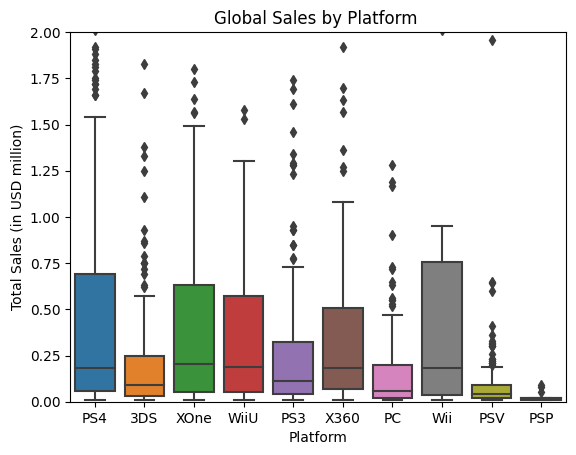

In [83]:
# Plot boxplot for global sales by platform
sns.boxplot(data =recent_df, x='platform', y='total_sales')
plt.title('Global Sales by Platform ')
plt.ylim(0,2)
plt.xlabel('Platform')
plt.ylabel('Total Sales (in USD million)')
plt.show()

In [30]:
# Calculate the statistics for sales by platform
platform_sales_stat =recent_df.groupby('platform')['total_sales'].agg(['mean','std','var'])
print(platform_sales_stat)

              mean       std       var
platform                              
3DS       0.408868  1.188368  1.412219
PC        0.179139  0.329359  0.108477
PS3       0.311324  0.633059  0.400764
PS4       0.766356  1.614969  2.608124
PSP       0.027692  0.027735  0.000769
PSV       0.076554  0.141755  0.020095
Wii       0.460909  0.625451  0.391189
WiiU      0.588767  1.161467  1.349005
X360      0.434414  0.628967  0.395599
XOne      0.615614  1.046513  1.095189


Here we plot the boxplot for the global sales of all games by platform and PS4 is leading in sales. PS4 is more spreaded in sales and PSP is least spreaded. From the boxplot, it is clear that difference in sales is significant.

###  Our aim is to find how user and professional reviews affect sales for  popular platform. For this analysis we choose top 3 platforms recently having leading sales. i.e,PS4, XOne, 3DS.Also build a scatter plot and calculate the correlation between reviews and sales. 

 Correlation coefficient for PS4: -0.040131589472697356
 Correlation coefficient for XOne: -0.0703839280647581
 Correlation coefficient for 3DS: 0.2151932718527028


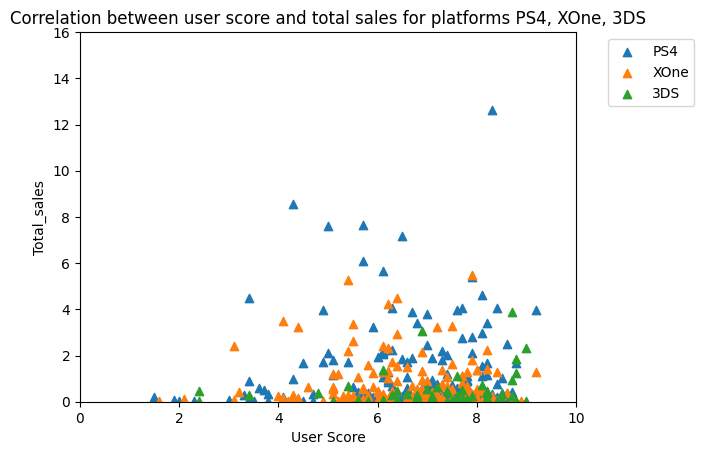

In [31]:
# Plot scatter plot for popular platforms and find corelation between user score and total sales
platforms = ['PS4', 'XOne', '3DS']
for platform in platforms:
    platform_subset = recent_df[recent_df['platform']==platform]
    plt.scatter(platform_subset['user_score'],platform_subset['total_sales'],label=platform, marker='^')
    correlation =platform_subset['user_score']. corr(platform_subset['total_sales'])
    print(f" Correlation coefficient for {platform}: {correlation}")
 
plt.xlabel('User Score')
plt.ylabel('Total_sales')
plt.ylim(0,16)
plt.xlim(0,10)
plt.title('Correlation between user score and total sales for platforms PS4, XOne, 3DS')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()



To find the correlation between user score and sales we choose three popular platforms and plot scatterplot.  The coorelation coefficent for PS4 and XOne are negative and corelation coefficent for 3DS is positive. Positive coefficent means if one value increases together with other, i.e, if user score increases total sales also increases. From the above plot, we can infer that user_score is not a main factor to increase total sales.

 Correlation coefficient for PS4: 0.40266141068104083
 Correlation coefficient for XOne: 0.42867694370333226
 Correlation coefficient for 3DS: 0.314117492869051


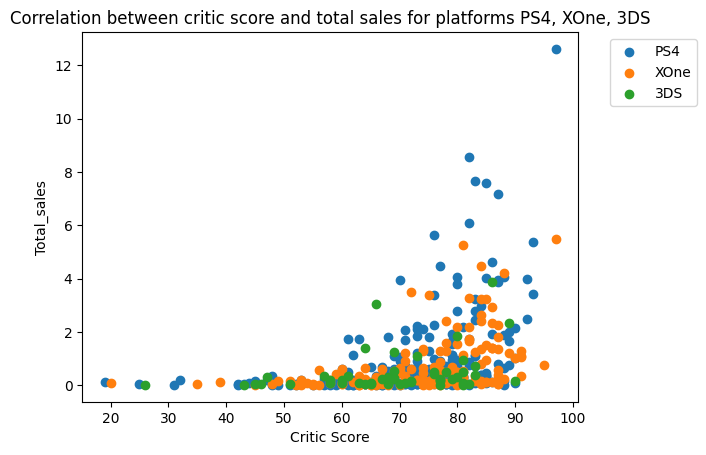

In [32]:
# Plot scatter plot for popular platforms and find corelation between critic score and total sales
platforms = ['PS4', 'XOne', '3DS']
for platform in platforms:
    platform_subset = recent_df[recent_df['platform']==platform]
    plt.scatter(platform_subset['critic_score'],platform_subset['total_sales'],label=platform, marker='o')
    correlation =platform_subset['critic_score']. corr(platform_subset['total_sales'])
    print(f" Correlation coefficient for {platform}: {correlation}")
 
plt.xlabel('Critic Score')
plt.ylabel('Total_sales')
plt.title('Correlation between critic score and total sales for platforms PS4, XOne, 3DS')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

To find the correlation between critic score and sales we choose three popular platforms and plot scatterplot.  The coorelation coefficent for PS4, XOne and 3DS is positive. Positive coefficent means if one value increases together with other, i.e, if critic score increases total sales also increases. From the above plot, we can infer that professional review is high, sales will increase.

###  Our aim is to find the general distribution of games by genre.Also comment about the most profitable genres and is it possible to  generalize about genres with high and low sales.

In [33]:
# Calculate the statistics for sales by genre
genre_sales_stat =recent_df.groupby('genre')['total_sales'].agg(['mean','std','var'])
print(genre_sales_stat)

                  mean       std       var
genre                                     
Action        0.322068  0.798181  0.637093
Adventure     0.094865  0.203147  0.041269
Fighting      0.470333  1.188053  1.411471
Misc          0.332301  0.736999  0.543168
Platform      0.476053  0.722561  0.522095
Puzzle        0.157857  0.320629  0.102803
Racing        0.398841  0.963716  0.928749
Role-Playing  0.458108  1.174693  1.379904
Shooter       1.335469  2.050567  4.204827
Simulation    0.298409  0.646925  0.418511
Sports        0.680000  1.239736  1.536946
Strategy      0.107027  0.118412  0.014021


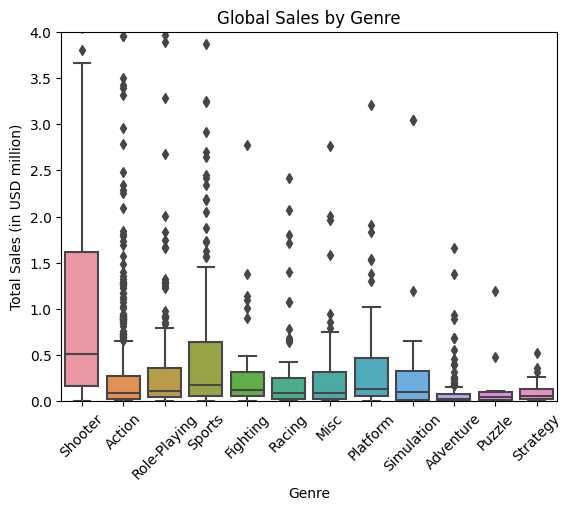

In [34]:
# Plot boxplot for global sales by genre
sns.boxplot(data =recent_df, x='genre', y='total_sales')
plt.title('Global Sales by Genre')
plt.ylim(0,4)
plt.xlabel('Genre')
plt.ylabel('Total Sales (in USD million)')
plt.xticks(rotation=45)
plt.show()

In [35]:
# To calculate most profitable genres
genre_sales =recent_df.groupby('genre')['total_sales'].sum()
print(genre_sales.sort_values(ascending=False))

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.70
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: total_sales, dtype: float64


From the above result top five profitable genres are action, shooter, sports, role playing, misc respectively. The median of shooter is higher than others and larger spread is also for genre shooter. Genres with low sales includes puzzle, strategy etc

## Conclusion:
    In this stage we analyze the data and find top platforms, top genres, how sales varied from platform to platform etc.  The top 5 platforms having greatest sales are PS2, X360, PS3, Wii and DS respectively.The platforms used in last 3 years are PS4, 3DS, XOne, WiiU, PS3 X360, PC, Wii, PSV and PSP.The top 5 leading sales platforms recently are PS4, XOne, 3DS, PS3 and X360 respectively. Top five profitable genres are action, shooter, sports, role playing, misc respectively.

## Fourth Stage:
 In this stage, create a user profile for each region. For each region (NA, EU, JP), determine:
 - The top five platforms. Describe variations in their market shares from region to region.
 - The top five genres. Explain the difference.
 - Do ESRB ratings affect sales in individual regions

### Top five platforms of each region

  platform  na_sales
0      PS4     98.61
1     XOne     81.27
2     X360     28.30
3      3DS     22.64
4      PS3     22.05


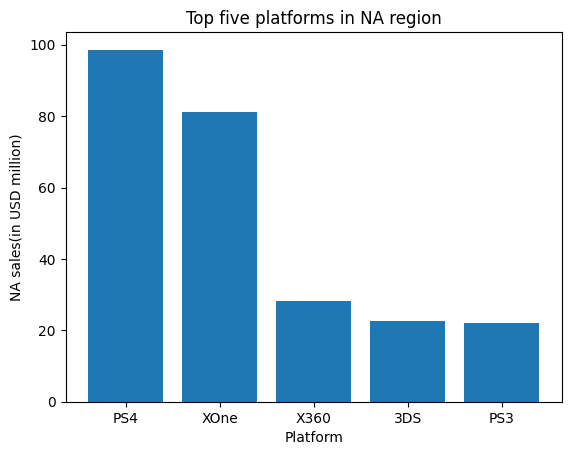

In [84]:
# Top five platforms in NA region
na_sales_platform =recent_df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()
print(na_sales_platform.head())
plt.bar(na_sales_platform['platform'][:5],na_sales_platform['na_sales'][:5])
plt.title('Top five platforms in NA region')
plt.xlabel('Platform')
plt.ylabel('NA sales(in USD million)')
plt.show()

Top five platforms in North American region are PS4, XOne, X360, 3DS and PS3.

  platform  eu_sales
0      PS4    130.04
1     XOne     46.25
2      PS3     25.54
3       PC     17.97
4      3DS     16.12


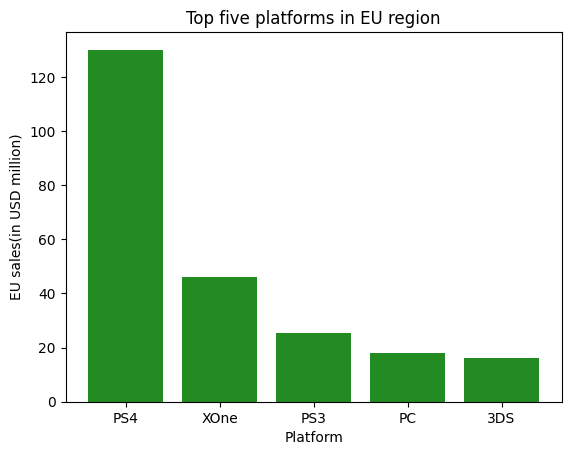

In [85]:
# Top five platforms in EU region
eu_sales_platform =recent_df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()
print(eu_sales_platform.head())
plt.bar(eu_sales_platform['platform'][:5],eu_sales_platform['eu_sales'][:5], color='forestgreen')
plt.title('Top five platforms in EU region')
plt.xlabel('Platform')
plt.ylabel('EU sales(in USD million)')
plt.show()

Top five platforms in Europe region are PS4, XONE, PS3, PC and 3DS.

  platform  jp_sales
0      3DS     44.24
1      PS4     15.02
2      PSV     14.61
3      PS3     11.22
4     WiiU      7.31


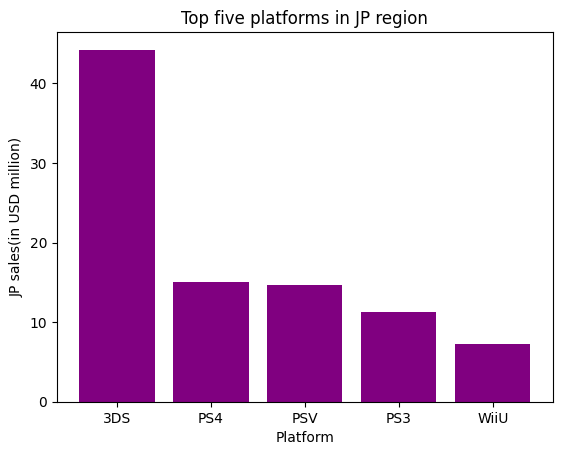

In [87]:
# Top five platforms in JP region
jp_sales_platform =recent_df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()
print(jp_sales_platform.head())
plt.bar(jp_sales_platform['platform'][:5],jp_sales_platform['jp_sales'][:5], color='purple')
plt.title('Top five platforms in JP region')
plt.xlabel('Platform')
plt.ylabel('JP sales(in USD million)')
plt.show()

Top five platforms in Japan region are 3DS, PS4, PSV, PS3 and WiiU

Top five platforms in NA, EU and JP region are different which means people in different region have their own interests based on there culture, country etc. In North America and Europe PS4 and XOne ocuupys among first three positions whereas in Japan XOne is not in first five. The XOne is a home video game console that was developed by Microsoft and more NA people prefer Microsoft console than other. 3DS occupys first position in Japan, fifth position in Europe and fourth position in North America.

### Top five genres of each region

          genre  na_sales
0       Shooter     79.02
1        Action     72.53
2        Sports     46.13
3  Role-Playing     33.58
4          Misc     15.05


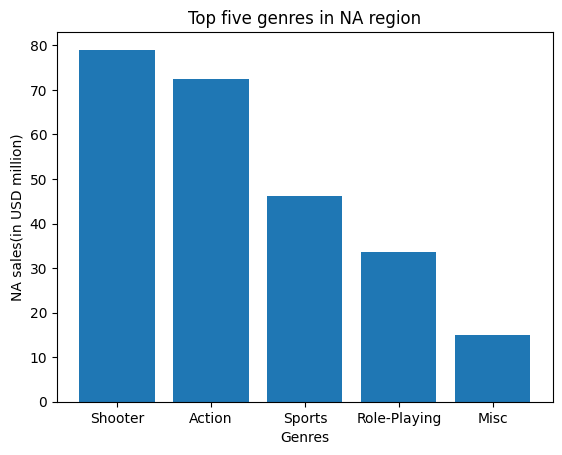

In [88]:
# Top five genres in NA region
na_sales_genre = recent_df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index()
print(na_sales_genre.head())
plt.bar(na_sales_genre['genre'][:5],na_sales_genre['na_sales'][:5])
plt.title('Top five genres in NA region')
plt.xlabel('Genres')
plt.ylabel('NA sales(in USD million)')
plt.show()

The top genres in NA region are shooter, action, sports, roleplaying

          genre  eu_sales
0        Action     74.68
1       Shooter     65.52
2        Sports     45.73
3  Role-Playing     28.22
4        Racing     14.13


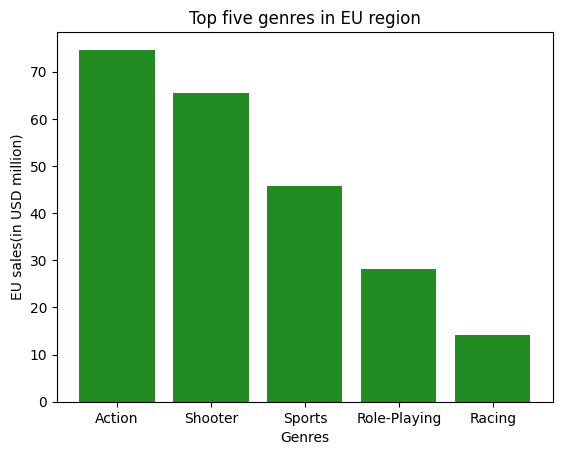

In [90]:
# Top five genres in eu region
eu_sales_genre = recent_df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index()
print(eu_sales_genre.head())
plt.bar(eu_sales_genre['genre'][:5],eu_sales_genre['eu_sales'][:5],color='forestgreen')
plt.title('Top five genres in EU region')
plt.xlabel('Genres')
plt.ylabel('EU sales(in USD million)')
plt.show()

          genre  jp_sales
0  Role-Playing     31.23
1        Action     29.58
2      Fighting      6.37
3          Misc      5.61
4       Shooter      4.87


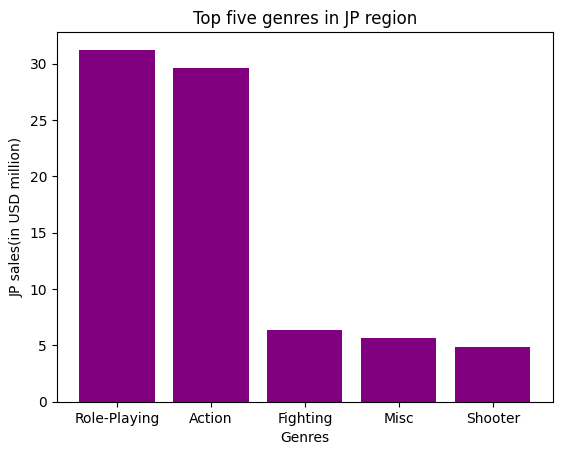

In [44]:
# Top five genres in jp region
jp_sales_genre = recent_df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index()
print(jp_sales_genre.head())
plt.bar(jp_sales_genre['genre'][:5],jp_sales_genre['jp_sales'][:5],color='purple')
plt.title('Top five genres in JP region')
plt.xlabel('Genres')
plt.ylabel('JP sales(in USD million)')
plt.show()

The top genres in JP region are role playing, action, fighting,shooter

The first three genres in North America and Europe are action, sports and shooter whereas Japan people like roleplaying genre than any other genres. 

### Sales in each region by ESRB rating

In [93]:
# Sales by rating
na_sales_rating = df.groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index()
print(na_sales_rating.head())


  rating  na_sales
0      E   1292.99
1      T    759.75
2      M    748.48
3   E10+    353.32
4    K-A      2.56


In [94]:
# Sales by rating
eu_sales_rating = df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index()
print(eu_sales_rating.head())


  rating  eu_sales
0      E    710.25
1      M    483.97
2      T    427.03
3   E10+    188.52
4     AO      0.61


In [95]:
# Sales by rating
jp_sales_rating = df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index()
print(jp_sales_rating.head())

  rating  jp_sales
0      E    198.11
1      T    151.40
2      M     64.24
3   E10+     40.20
4    K-A      1.46


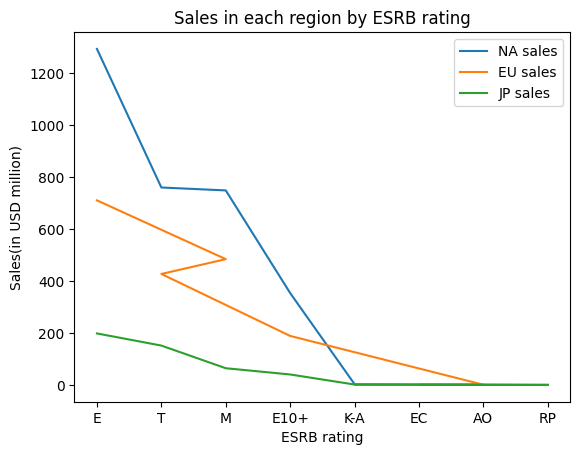

In [96]:
# Plot by rating
plt.plot(na_sales_rating['rating'], na_sales_rating['na_sales'], label = 'NA sales')
plt.plot(eu_sales_rating['rating'], eu_sales_rating['eu_sales'], label = 'EU sales')
plt.plot(jp_sales_rating['rating'], jp_sales_rating['jp_sales'], label = 'JP sales')
plt.title('Sales in each region by ESRB rating')
plt.xlabel('ESRB rating')
plt.ylabel('Sales(in USD million)')
plt.legend()
plt.show()

The Entertainment Software Rating Board(ESRB) evaluates a game's content and assigns an age rating such as Teen or Mature. In Japan ESBR rating is not affected for sales because maximum sales is for unknown rating. In EU and NA also large amount of sales for unknown ESBR. So ESBR is not an important factor for increasing  the sale.

## Fifth Stage :
In this stage test the following hypotheses:
— Average user ratings of the Xbox One and PC platforms are the same. 
— Average user ratings for the Action and Sports genres are different.
Set the alpha threshold value. 

Formulate the null and alternate hypothesis.
- H0 :Average user ratings of the Xbox One and PC platforms are the same. 
- H1 :Average user ratings of the Xbox One and PC platforms are the different.

Choose alpha = 0.05

In [97]:
# Check the hypothesis
xbox_user_ratings =recent_df[recent_df['platform']=='XOne']['user_score']
pc_user_ratings =recent_df[recent_df['platform']=='PC']['user_score']
alpha = 0.05
results=st.ttest_ind(xbox_user_ratings.dropna(),pc_user_ratings.dropna())
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 0.10450507919348415
We can't reject the null hypothesis


We test the hypothesis using t test and we can't reject the null hypothesis that means average user ratings of the Xbox One and PC platforms are same. 

Formulate the null and alternate hypothesis.
- H0 :Average user ratings of the Action and Sports genres are the same. 
- H1 :Average user ratings of the Action and Sports genres are the different. 

Choose alpha = 0.05

In [98]:
# Check the hypothesis
action_user_ratings =recent_df[recent_df['genre']=='Action']['user_score']
sports_user_ratings =recent_df[recent_df['genre']=='Sports']['user_score']
results=st.ttest_ind(action_user_ratings.dropna(),sports_user_ratings.dropna())
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 2.8711147985105864e-19
We reject the null hypothesis


We test the hypothesis using t test and we reject the null hypothesis that means average user ratings of the Action and Sports genres are different.

## Conclusion:
 In this project our aim is to analyze the  marketing trends for selling video games and get insights for the pattern. The project consists of different parts like:
- Data initialization and loading
- Data preprocessing
- Analysis of data
- Create a user profile for each region
- Testing the hypothesis
In the first stage, we import all the important libraries and intialize the data. In the second stage we preprocess the data like convert the datatypes to appropriate form, check for missing and duplicated values, rename columns etc. After this stage our data is clean and we can use it for further analysis. Some assumptions made in this stage are:

Year of release missing is filled with median value
Missing rating is filled as unknown
No changes in missing values of columns critic score and user score to keep the integrity of data.
In the third stage we analyze our data and find that:

The old platforms are fade out and new ones are developed
The maximum number of games are released in 2008-2009.
The top 5 platforms having greatest sales are PS2, X360, PS3, Wii and DS respectively.
The popular platforms which now have zero sales are PS2, NES, PS3, GB, GBA, DS etc.
The average life cycle for a platform is almost 5 to 6 years
The platforms used in last 3 years are PS4, 3DS, XOne, WiiU, PS3 X360, PC, Wii, PSV and PSP.
The top 5 leading and profitable recently sales platforms are PS4, XOne, 3DS
Top profitable genres are action, shooter, sports, role playing.
In the fourth stage we create a user profile for each region.

NA region Top platforms : PS4, XOne, X360, 3DS and PS3. Top genres :shooter, action, sports, roleplaying

EU region Top platforms :PS4, XONE, PS3, PC and 3DS. Top genres :action, sports, shooter, racing.

JP region Top platforms :3DS, PS4, PSV, PS3 and WiiU Top genres :role playing, action, fighting,shooter

In the last stage we formulate two hypothesis and found that:

Average user ratings of the Xbox One and PC platforms are the same.
Average user ratings of the Action and Sports genres are the different.
Total sales of videogames are different in different regions and new games are evolving each year and old ones are faded out. Peoples selection of games based on different factors and peoples in Japan like role playing or action genres where as people in NA prefers shooter games. So development of games corresponding to region increases the sales.


